## Import the libraries 

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [26]:
observations = 1000

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

## Solving with TensorFlow

In [27]:
training_data = np.load('TF_intro.npz')
training_data

In [30]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
                            tf.keras.layers.Dense(output_size,
                            kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                            bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1))
                            ])

# We can also define a custom optimizer, where we can specify the learning rate
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

history = model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)
print(history.params)

Epoch 1/100
32/32 - 0s - loss: 22.0687
Epoch 2/100
32/32 - 0s - loss: 1.4349
Epoch 3/100
32/32 - 0s - loss: 0.4417
Epoch 4/100
32/32 - 0s - loss: 0.3897
Epoch 5/100
32/32 - 0s - loss: 0.3725
Epoch 6/100
32/32 - 0s - loss: 0.3965
Epoch 7/100
32/32 - 0s - loss: 0.3633
Epoch 8/100
32/32 - 0s - loss: 0.3961
Epoch 9/100
32/32 - 0s - loss: 0.3712
Epoch 10/100
32/32 - 0s - loss: 0.3857
Epoch 11/100
32/32 - 0s - loss: 0.3934
Epoch 12/100
32/32 - 0s - loss: 0.3862
Epoch 13/100
32/32 - 0s - loss: 0.3674
Epoch 14/100
32/32 - 0s - loss: 0.3900
Epoch 15/100
32/32 - 0s - loss: 0.4084
Epoch 16/100
32/32 - 0s - loss: 0.3976
Epoch 17/100
32/32 - 0s - loss: 0.3964
Epoch 18/100
32/32 - 0s - loss: 0.3970
Epoch 19/100
32/32 - 0s - loss: 0.4107
Epoch 20/100
32/32 - 0s - loss: 0.3955
Epoch 21/100
32/32 - 0s - loss: 0.3768
Epoch 22/100
32/32 - 0s - loss: 0.4155
Epoch 23/100
32/32 - 0s - loss: 0.4271
Epoch 24/100
32/32 - 0s - loss: 0.4118
Epoch 25/100
32/32 - 0s - loss: 0.4186
Epoch 26/100
32/32 - 0s - loss: 0

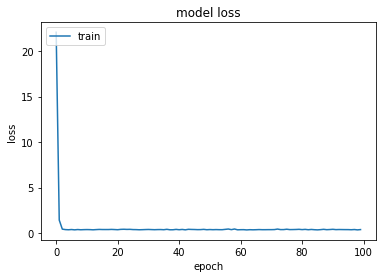

In [31]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Extract the weights and bias

In [15]:
model.layers[0].get_weights()

[array([[ 2.004967 ],
        [-2.9688196]], dtype=float32), array([5.0183926], dtype=float32)]

In [16]:
weights = model.layers[0].get_weights()[0]

In [17]:
bias = model.layers[0].get_weights()[1]
bias

array([5.0183926], dtype=float32)

## Extract the outputs (make predictions)

In [18]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ -6.4],
       [ 19.7],
       [ -3.3],
       [ 43. ],
       [ 24.2],
       [ -6.9],
       [ 24.9],
       [ 37.1],
       [-14.6],
       [ -2.5],
       [  4.1],
       [-16.2],
       [-17.2],
       [ 15.5],
       [  9.3],
       [  4.6],
       [ -9.5],
       [-23.6],
       [ -4.6],
       [-18.9],
       [ 25.2],
       [ -6.7],
       [ 14.3],
       [-20.4],
       [  8.2],
       [ 17.8],
       [ 17.3],
       [ 24.1],
       [-25.1],
       [-11.8],
       [ 31.7],
       [ 15.5],
       [-16.9],
       [  3.8],
       [  4.3],
       [-36.7],
       [ -8.5],
       [-33.1],
       [-16. ],
       [  4.8],
       [-13.4],
       [-31.1],
       [ -1.7],
       [ -6. ],
       [-21.1],
       [-14.7],
       [ -9.8],
       [  4.2],
       [-33.5],
       [  3.6],
       [  0.3],
       [ 40.9],
       [ 16.4],
       [ -4.7],
       [-13.5],
       [ 25.4],
       [ 35.2],
       [  6.6],
       [ 40.8],
       [ 11.5],
       [-30.8],
       [ 16.5],
       [

In [19]:
training_data['targets'].round(1)

array([[ -6. ],
       [ 19.6],
       [ -2.8],
       [ 43.1],
       [ 25. ],
       [ -7.3],
       [ 24.6],
       [ 38.2],
       [-14.8],
       [ -1.8],
       [  4. ],
       [-16.5],
       [-16.7],
       [ 16.4],
       [  8.8],
       [  4.1],
       [ -8.6],
       [-22.7],
       [ -4.4],
       [-19.5],
       [ 25.2],
       [ -8. ],
       [ 14.2],
       [-20.3],
       [  8.2],
       [ 18.1],
       [ 18.2],
       [ 25. ],
       [-25.7],
       [-12.7],
       [ 32.3],
       [ 15.1],
       [-16.7],
       [  3.5],
       [  3.6],
       [-37.3],
       [ -8.4],
       [-33.3],
       [-15.3],
       [  4. ],
       [-14. ],
       [-31. ],
       [ -2.4],
       [ -5.4],
       [-21.1],
       [-14.6],
       [-10.2],
       [  3.3],
       [-32.9],
       [  2.9],
       [ -0. ],
       [ 41.6],
       [ 17.1],
       [ -4.7],
       [-12.7],
       [ 25.3],
       [ 35. ],
       [  5.8],
       [ 41.7],
       [ 11.5],
       [-30.3],
       [ 17.5],
       [

## Plotting the data

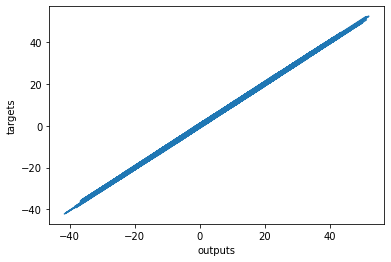

In [20]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()